In [366]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt


mental_health_df = pd.read_csv('Resources/tech_survey.csv')
burnout_data = pd.read_csv('Resources/burnout.csv')
phy_remote_data = pd.read_csv('Resources/impact_remote.csv')
men_remote_data = pd.read_csv('Resources/remote_mental.csv')
fitness_data = pd.read_csv('Resources/fitness.csv')

# Merging based on a shared identifier like employee_id, or relevant context (e.g., industry, job type)
#combined_data = mental_health_data.merge(burnout_data, on='employee_id').merge(productivity_data, on='employee_id').merge(work_life_balance_data, on='employee_id')
mental_health_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [367]:
mental_health_data = mental_health_df[mental_health_df['tech_company'] == 'Yes']

In [368]:
mental_health_data['work_interfere'].value_counts()


work_interfere
Sometimes    387
Never        178
Rarely       137
Often        113
Name: count, dtype: int64

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\4285700158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees_numeric'] = mental_health_data['no_employees'].map(employee_mapping)


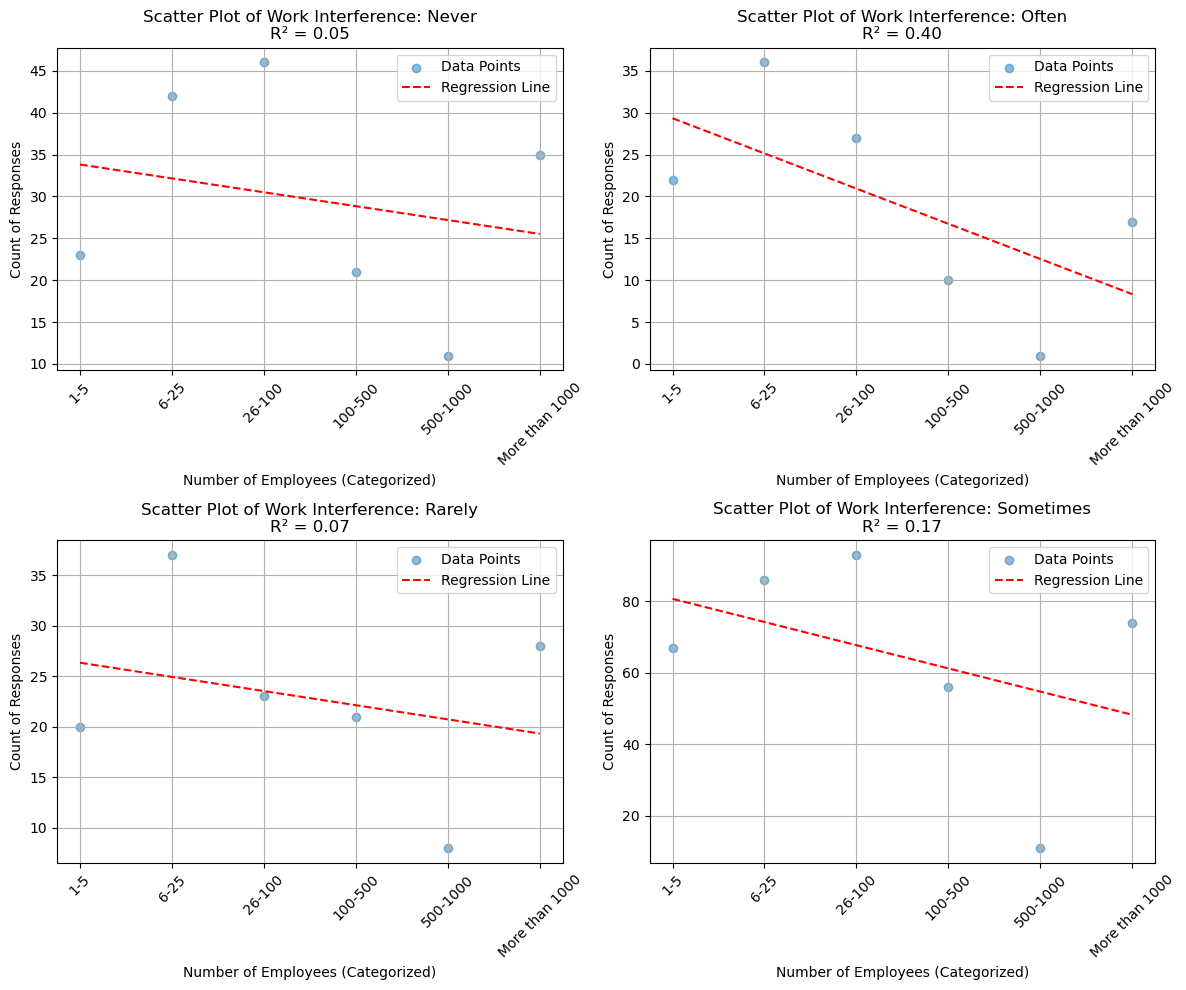

In [369]:
employee_mapping = {
    '1-5': 1,
    '6-25': 2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    'More than 1000': 6
}

# Map 'no_employees' to numeric values
mental_health_data['no_employees_numeric'] = mental_health_data['no_employees'].map(employee_mapping)


# Filter out rows with missing values in 'work_interfere' or 'no_employees_numeric' and remove "Don't know"
filtered_data = mental_health_data.dropna(subset=['work_interfere', 'no_employees_numeric'])
filtered_data = filtered_data[~filtered_data['work_interfere'].str.contains("don't know", case=False, na=False)]

# Count the number of responses for each combination of 'no_employees' and 'work_interfere'
count_data = filtered_data.groupby(['no_employees_numeric', 'work_interfere']).size().reset_index(name='count')

# List of unique work_interfere values (after filtering)
work_interfere_values = count_data['work_interfere'].unique()

# Check if we have more than four unique values
if len(work_interfere_values) > 4:
    work_interfere_values_to_plot = work_interfere_values[:4]  # Only keep the first four values
else:
    work_interfere_values_to_plot = work_interfere_values  # Keep all available values if less than four

# Create a 2x2 scatter plot for the selected 'work_interfere' values
plt.figure(figsize=(12, 10))  # Adjusted size for 2x2 layout
for i, value in enumerate(work_interfere_values_to_plot):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of plots
    subset = count_data[count_data['work_interfere'] == value]
    
    # Scatter plot with number of employees on x-axis and count of responses on y-axis
    plt.scatter(subset['no_employees_numeric'], subset['count'], alpha=0.5, label='Data Points')
    
    # Linear regression
    z = np.polyfit(subset['no_employees_numeric'], subset['count'], 1)
    p = np.poly1d(z)
    plt.plot(subset['no_employees_numeric'], p(subset['no_employees_numeric']), "r--", label='Regression Line')
    
    # Calculate R-squared
    residuals = subset['count'] - p(subset['no_employees_numeric'])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((subset['count'] - np.mean(subset['count']))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Adding labels and title for each subplot
    plt.title(f'Scatter Plot of Work Interference: {value}\nR² = {r_squared:.2f}', fontsize=12)
    plt.xlabel('Number of Employees (Categorized)', fontsize=10)
    plt.ylabel('Count of Responses', fontsize=10)
    
    # Set x-ticks to show original categories
    plt.xticks(ticks=list(employee_mapping.values()), labels=list(employee_mapping.keys()), rotation=45)
    
    plt.grid(True)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\2364290081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['work_interfere'] = pd.Categorical(mental_health_data['work_interfere'], categories=work_interfere_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\2364290081.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'work_interfere']).size().unstack(fill_value=0)


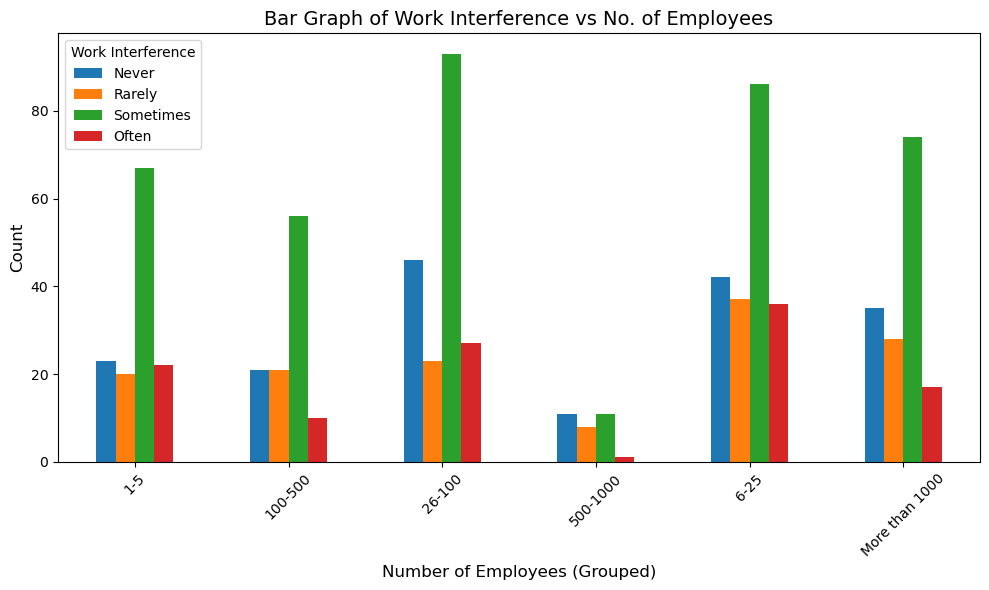

In [370]:
work_interfere_order = ['Never', 'Rarely', 'Sometimes', 'Often']

# Convert 'work_interfere' to a categorical type with the correct order
mental_health_data['work_interfere'] = pd.Categorical(mental_health_data['work_interfere'], categories=work_interfere_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'work_interfere']).size().unstack(fill_value=0)

bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of Work Interference vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Work Interference')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\28094235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\28094235.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'remote_work']).size().unstack(fill_value=0)


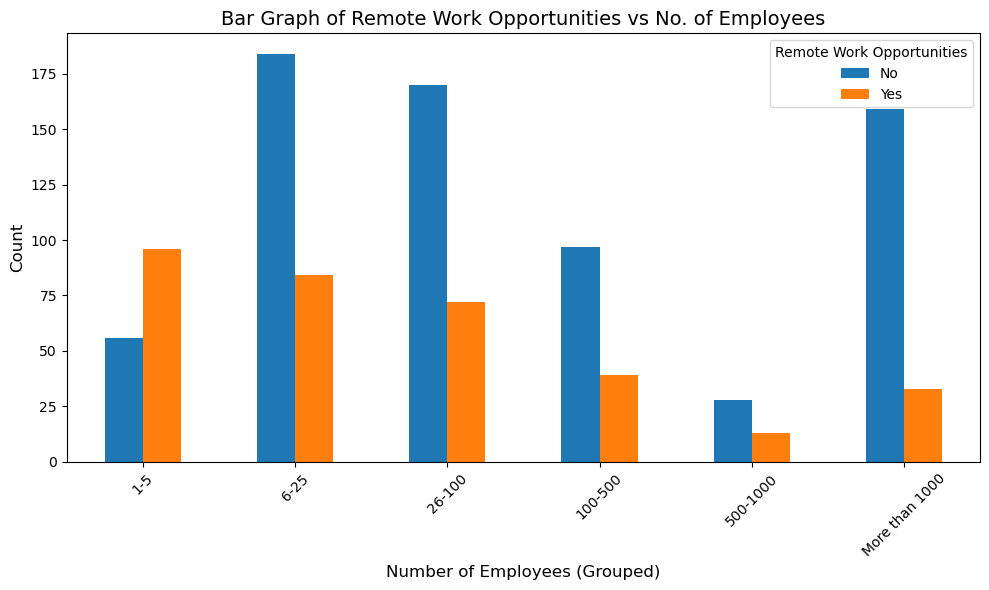

In [371]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']


mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'remote_work']).size().unstack(fill_value=0)

bar_data.plot(kind='bar', figsize=(10, 6))


plt.title('Bar Graph of Remote Work Opportunities vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Remote Work Opportunities')
# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\2248638414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\2248638414.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'benefits']).size().unstack(fill_value=0)


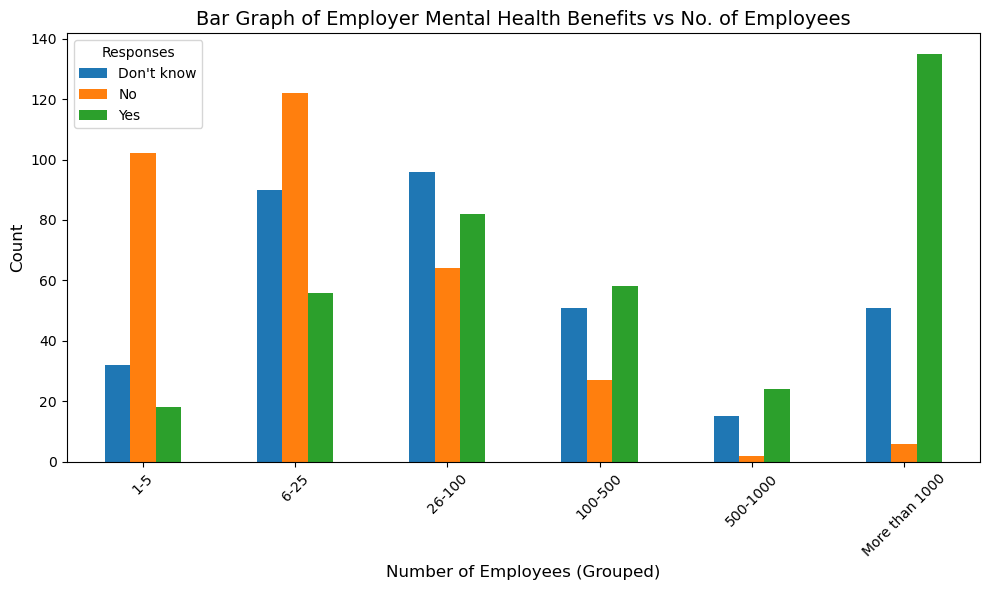

In [372]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Convert 'no_employees' to a categorical type with the correct order
mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'benefits']).size().unstack(fill_value=0)



bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of Employer Mental Health Benefits vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Responses')
# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\1952885025.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees_numeric'] = mental_health_data['no_employees'].map(employee_mapping)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\1952885025.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = filtered_data.groupby(['no_employees_numeric', 'benefits']).size().reset_index(name='count')


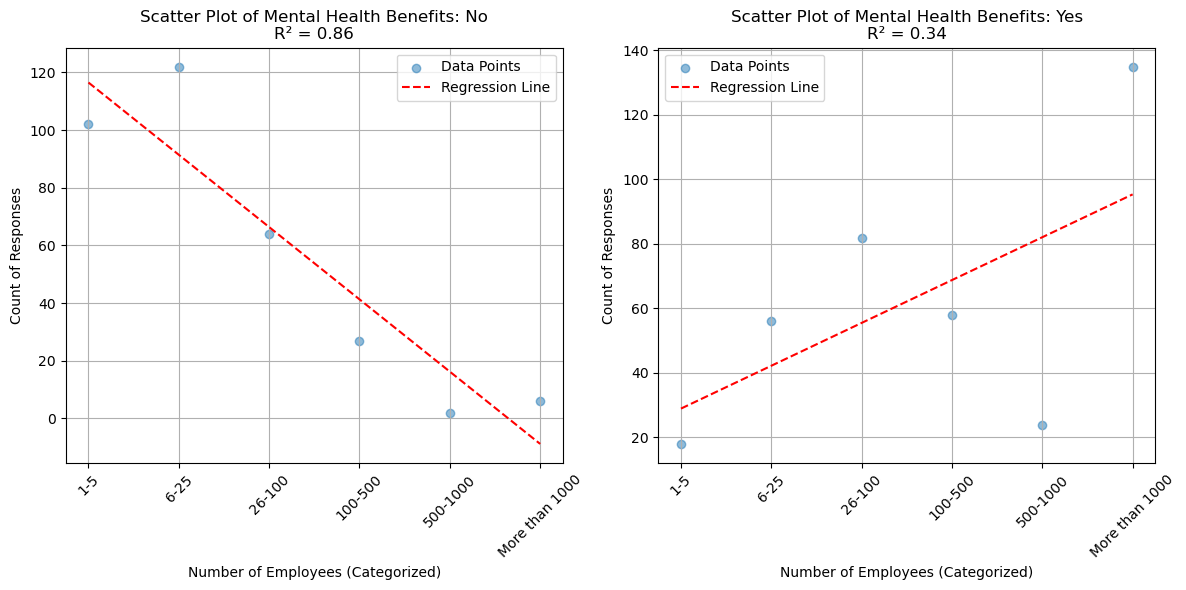

In [373]:
employee_mapping = {
    '1-5': 1,
    '6-25': 2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    'More than 1000': 6
}

# Map 'no_employees' to numeric values
mental_health_data['no_employees_numeric'] = mental_health_data['no_employees'].map(employee_mapping)

# Filter out rows with missing values in 'benefits' or 'no_employees_numeric' and remove "Don't know"
filtered_data = mental_health_data.dropna(subset=['benefits', 'no_employees_numeric'])
filtered_data = filtered_data[filtered_data['benefits'] != "Don't know"]

# Count the number of responses for each combination of 'no_employees' and 'benefits'
count_data = filtered_data.groupby(['no_employees_numeric', 'benefits']).size().reset_index(name='count')

# List of unique values in 'benefits' (after filtering)
benefits_values = count_data['benefits'].unique()

# Create a scatter plot for each 'benefits' value
plt.figure(figsize=(12, 6))  # Adjusted size for 1x2 layout
for i, value in enumerate(benefits_values):
    plt.subplot(1, 2, i + 1)  # Create a 1x2 grid of plots
    subset = count_data[count_data['benefits'] == value]
    
    # Scatter plot with number of employees on x-axis and count of responses on y-axis
    plt.scatter(subset['no_employees_numeric'], subset['count'], alpha=0.5, label='Data Points')
    
    # Linear regression
    z = np.polyfit(subset['no_employees_numeric'], subset['count'], 1)
    p = np.poly1d(z)
    plt.plot(subset['no_employees_numeric'], p(subset['no_employees_numeric']), "r--", label='Regression Line')
    
    # Calculate R-squared
    residuals = subset['count'] - p(subset['no_employees_numeric'])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((subset['count'] - np.mean(subset['count']))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Adding labels and title for each subplot
    plt.title(f'Scatter Plot of Mental Health Benefits: {value}\nR² = {r_squared:.2f}', fontsize=12)
    plt.xlabel('Number of Employees (Categorized)', fontsize=10)
    plt.ylabel('Count of Responses', fontsize=10)
    
    # Set x-ticks to show original categories
    plt.xticks(ticks=list(employee_mapping.values()), labels=list(employee_mapping.keys()), rotation=45)
    
    plt.grid(True)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\3197321116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\3197321116.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'care_options']).size().unstack(fill_value=0)


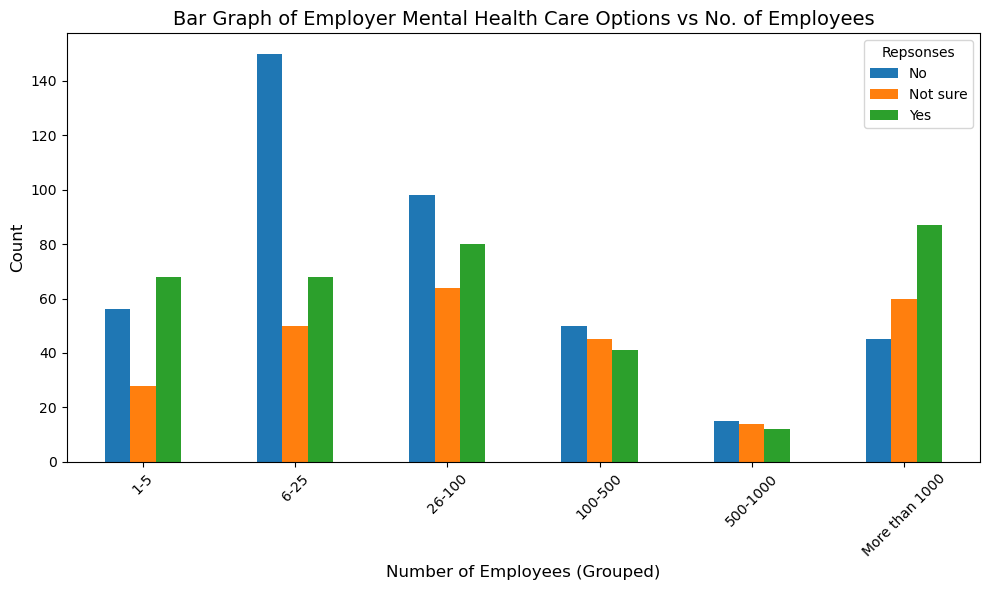

In [374]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Convert 'no_employees' to a categorical type with the correct order
mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'care_options']).size().unstack(fill_value=0)



bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of Employer Mental Health Care Options vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Repsonses')
# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\74304744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\74304744.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'seek_help']).size().unstack(fill_value=0)


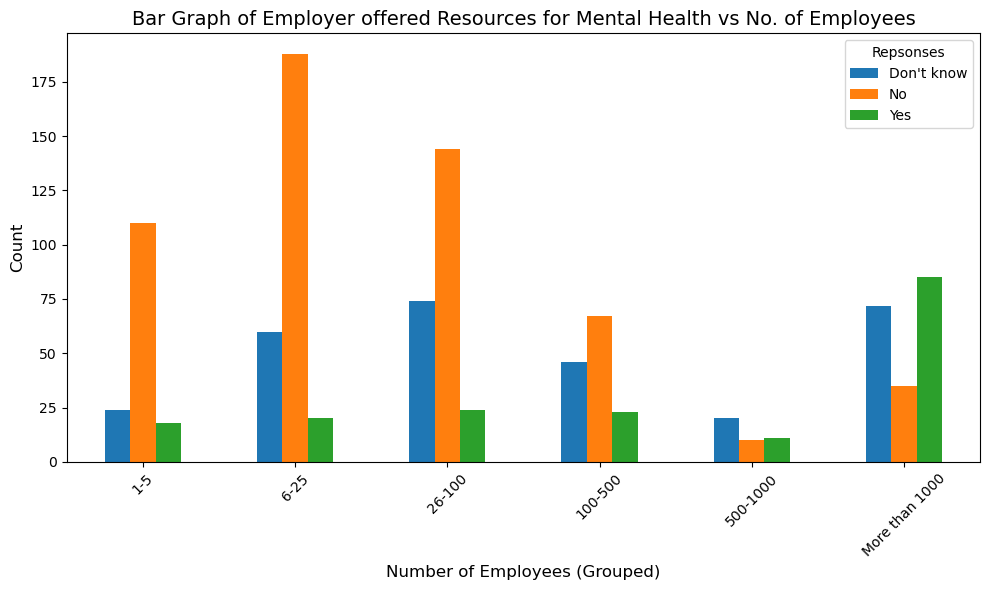

In [375]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Convert 'no_employees' to a categorical type with the correct order
mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'seek_help']).size().unstack(fill_value=0)



bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of Employer offered Resources for Mental Health vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Repsonses')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\3581530293.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees_numeric'] = mental_health_data['no_employees'].map(employee_mapping)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\3581530293.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = filtered_data.groupby(['no_employees_numeric', 'seek_help']).size().reset_index(name='count')


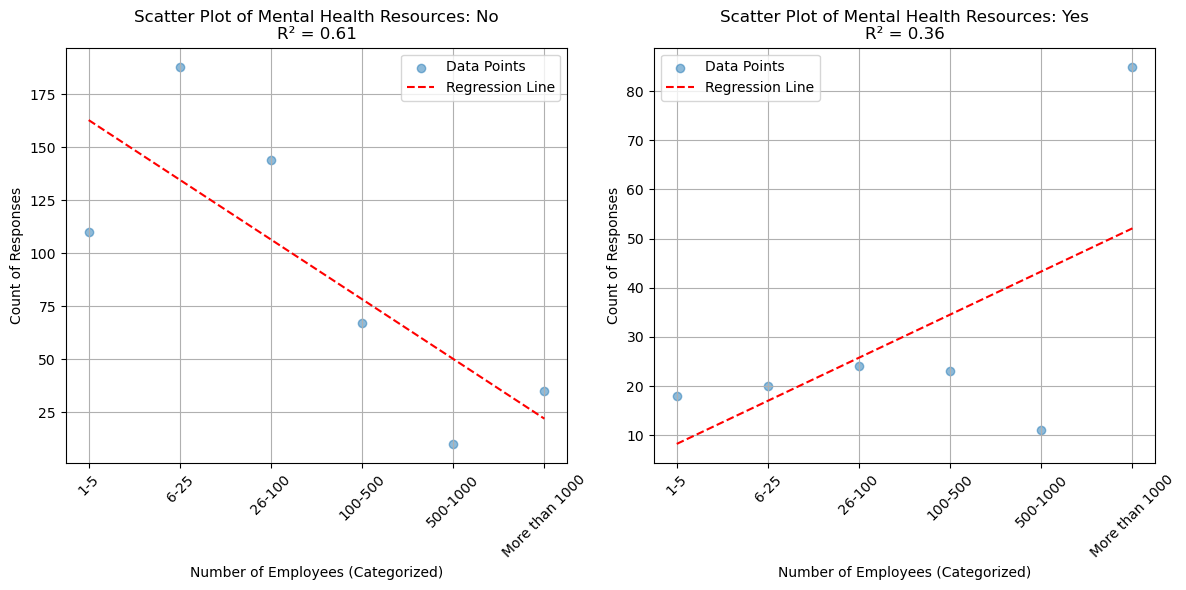

In [376]:
employee_mapping = {
    '1-5': 1,
    '6-25': 2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    'More than 1000': 6
}

# Map 'no_employees' to numeric values
mental_health_data['no_employees_numeric'] = mental_health_data['no_employees'].map(employee_mapping)

# Filter out rows with missing values in 'seek_help' or 'no_employees_numeric' and remove "Don't know"
filtered_data = mental_health_data.dropna(subset=['seek_help', 'no_employees_numeric'])
filtered_data = filtered_data[filtered_data['seek_help'] != "Don't know"]

# Count the number of responses for each combination of 'no_employees' and 'seek_help'
count_data = filtered_data.groupby(['no_employees_numeric', 'seek_help']).size().reset_index(name='count')

# List of unique values in 'seek_help' (after filtering)
seek_help_values = count_data['seek_help'].unique()

# Create a scatter plot for each 'seek_help' value
plt.figure(figsize=(12, 6))  # Adjusted size for 1x2 layout
for i, value in enumerate(seek_help_values):
    plt.subplot(1, 2, i + 1)  # Create a 1x2 grid of plots
    subset = count_data[count_data['seek_help'] == value]
    
    # Scatter plot with number of employees on x-axis and count of responses on y-axis
    plt.scatter(subset['no_employees_numeric'], subset['count'], alpha=0.5, label='Data Points')
    
    # Linear regression
    z = np.polyfit(subset['no_employees_numeric'], subset['count'], 1)
    p = np.poly1d(z)
    plt.plot(subset['no_employees_numeric'], p(subset['no_employees_numeric']), "r--", label='Regression Line')
    
    # Calculate R-squared
    residuals = subset['count'] - p(subset['no_employees_numeric'])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((subset['count'] - np.mean(subset['count']))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Adding labels and title for each subplot
    plt.title(f'Scatter Plot of Mental Health Resources: {value}\nR² = {r_squared:.2f}', fontsize=12)
    plt.xlabel('Number of Employees (Categorized)', fontsize=10)
    plt.ylabel('Count of Responses', fontsize=10)
    
    # Set x-ticks to show original categories
    plt.xticks(ticks=list(employee_mapping.values()), labels=list(employee_mapping.keys()), rotation=45)
    
    plt.grid(True)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\34703215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\34703215.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'anonymity']).size().unstack(fill_value=0)


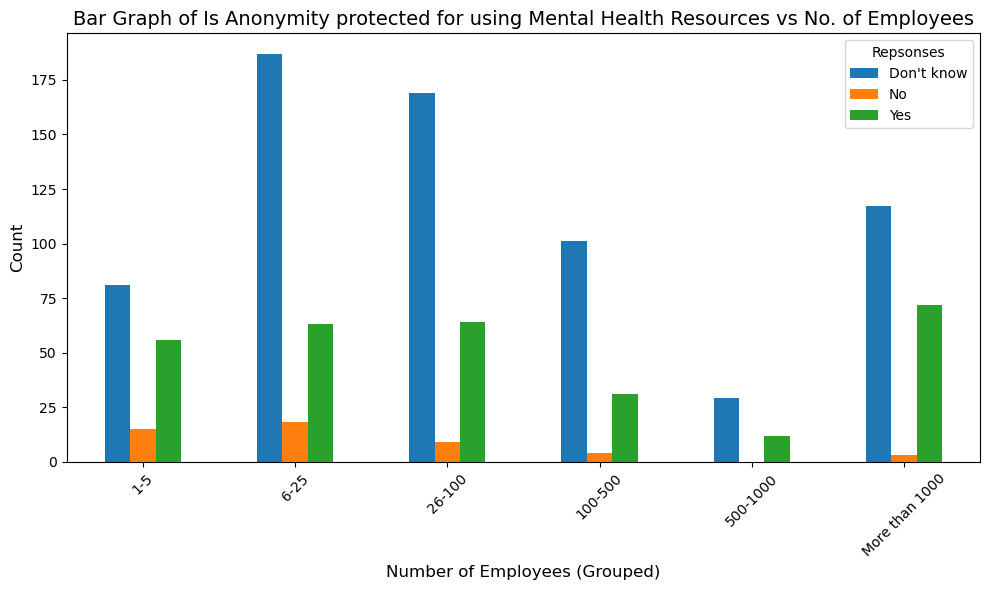

In [377]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Convert 'no_employees' to a categorical type with the correct order
mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'anonymity']).size().unstack(fill_value=0)



bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of Is Anonymity protected for using Mental Health Resources vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Repsonses')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\3413967555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['leave'] = pd.Categorical(mental_health_data['leave'], categories=response, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\3413967555.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_236

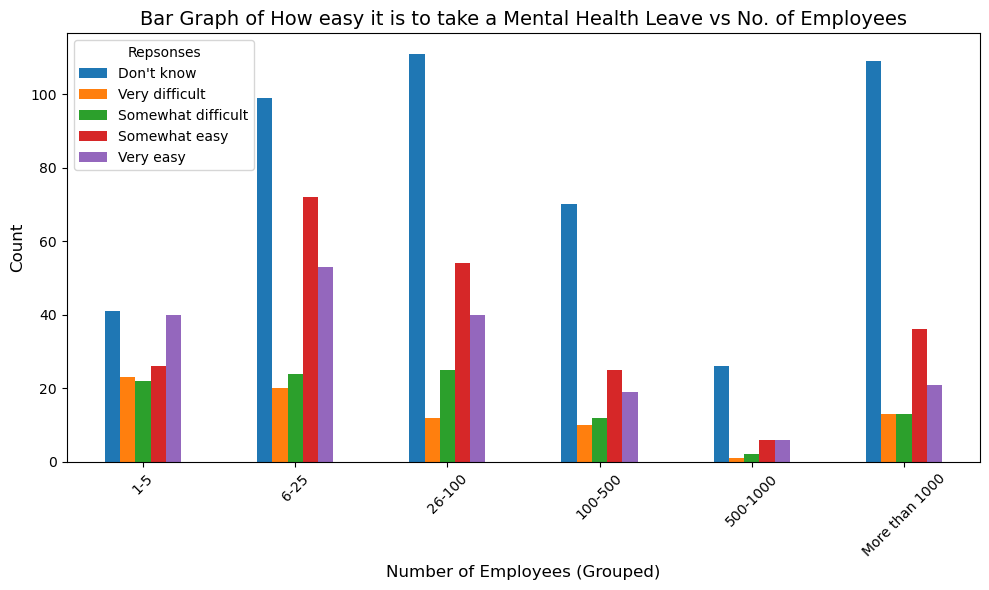

In [378]:
response = ["Don't know", "Very difficult", "Somewhat difficult", "Somewhat easy", "Very easy"]

# Convert 'work_interfere' to a categorical type with the correct order
mental_health_data['leave'] = pd.Categorical(mental_health_data['leave'], categories=response, ordered=True)




employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Convert 'no_employees' to a categorical type with the correct order
mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'leave']).size().unstack(fill_value=0)



bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of How easy it is to take a Mental Health Leave vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Repsonses')
# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\1594557905.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees_numeric'] = mental_health_data['no_employees'].map(employee_mapping)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\1594557905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['leave'] = mental_health_data['leave'].str.strip().str.lower()
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\1594557905.py:19: FutureWarning: The default of ob

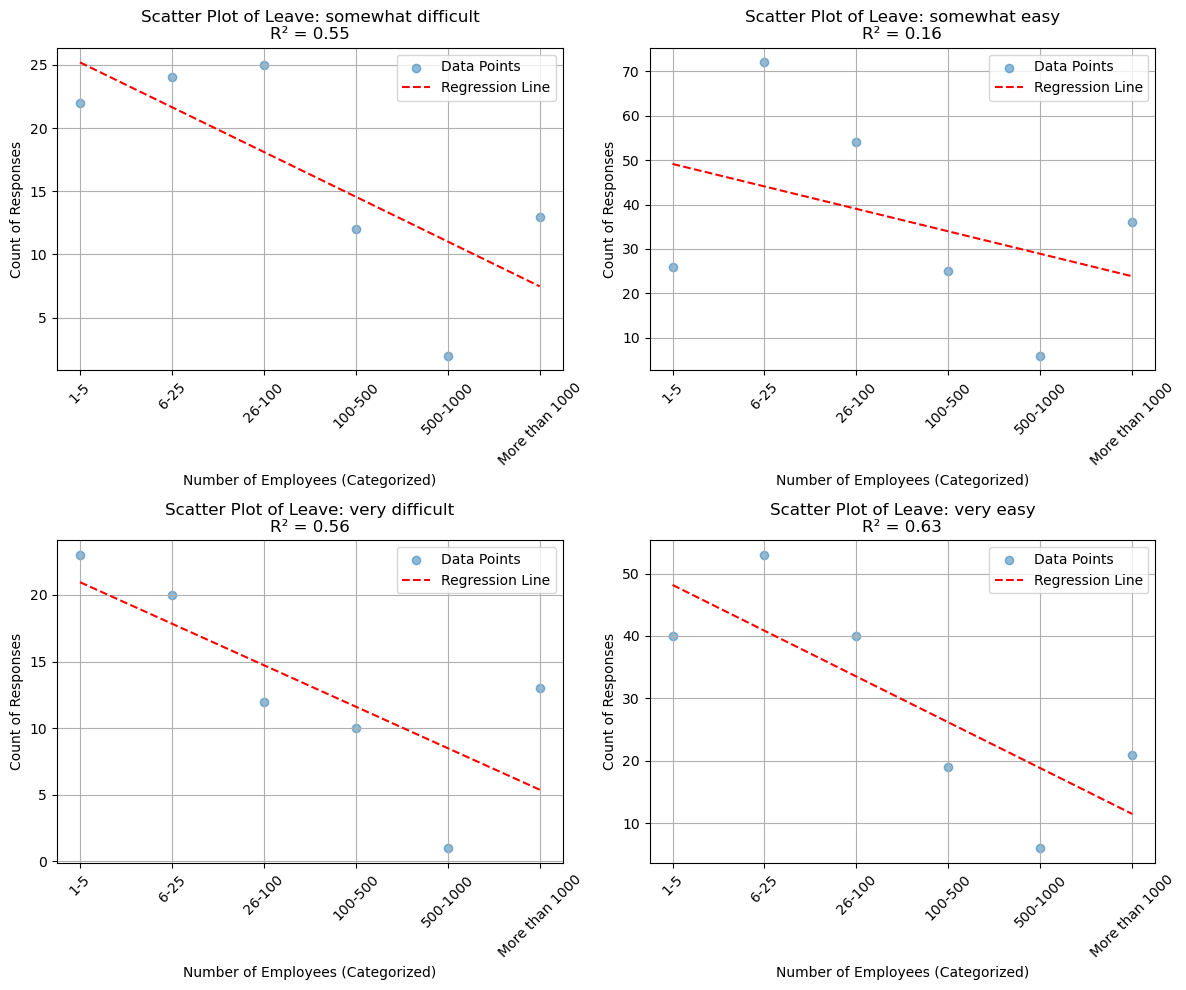

In [379]:
employee_mapping = {
    '1-5': 1,
    '6-25': 2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    'More than 1000': 6
}

# Map 'no_employees' to numeric values
mental_health_data['no_employees_numeric'] = mental_health_data['no_employees'].map(employee_mapping)
mental_health_data['leave'] = mental_health_data['leave'].str.strip().str.lower()

# Filter out rows with missing values in 'leave' or 'no_employees_numeric' and remove "Don't know"
filtered_data = mental_health_data.dropna(subset=['leave', 'no_employees_numeric'])
filtered_data = filtered_data[~filtered_data['leave'].str.contains("don't know", case=False, na=False)]

# Count the number of responses for each combination of 'no_employees' and 'leave'
count_data = filtered_data.groupby(['no_employees_numeric', 'leave']).size().reset_index(name='count')

# List of unique leave values (after filtering)
leave_values = count_data['leave'].unique()

# Check if we have more than four unique values
if len(leave_values) > 4:
    leave_values_to_plot = leave_values[:4]  # Only keep the first four values
else:
    leave_values_to_plot = leave_values  # Keep all available values if less than four

# Create a 2x2 scatter plot for the selected 'leave' values
plt.figure(figsize=(12, 10))  # Adjusted size for 2x2 layout
for i, value in enumerate(leave_values_to_plot):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of plots
    subset = count_data[count_data['leave'] == value]
    
    # Scatter plot with number of employees on x-axis and count of responses on y-axis
    plt.scatter(subset['no_employees_numeric'], subset['count'], alpha=0.5, label='Data Points')
    
    # Linear regression
    z = np.polyfit(subset['no_employees_numeric'], subset['count'], 1)
    p = np.poly1d(z)
    plt.plot(subset['no_employees_numeric'], p(subset['no_employees_numeric']), "r--", label='Regression Line')
    
    # Calculate R-squared
    residuals = subset['count'] - p(subset['no_employees_numeric'])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((subset['count'] - np.mean(subset['count']))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Adding labels and title for each subplot
    plt.title(f'Scatter Plot of Leave: {value}\nR² = {r_squared:.2f}', fontsize=12)
    plt.xlabel('Number of Employees (Categorized)', fontsize=10)
    plt.ylabel('Count of Responses', fontsize=10)
    
    # Set x-ticks to show original categories
    plt.xticks(ticks=list(employee_mapping.values()), labels=list(employee_mapping.keys()), rotation=45)
    
    plt.grid(True)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\341649081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\341649081.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'mental_health_consequence']).size().unstack(fill_value=0)


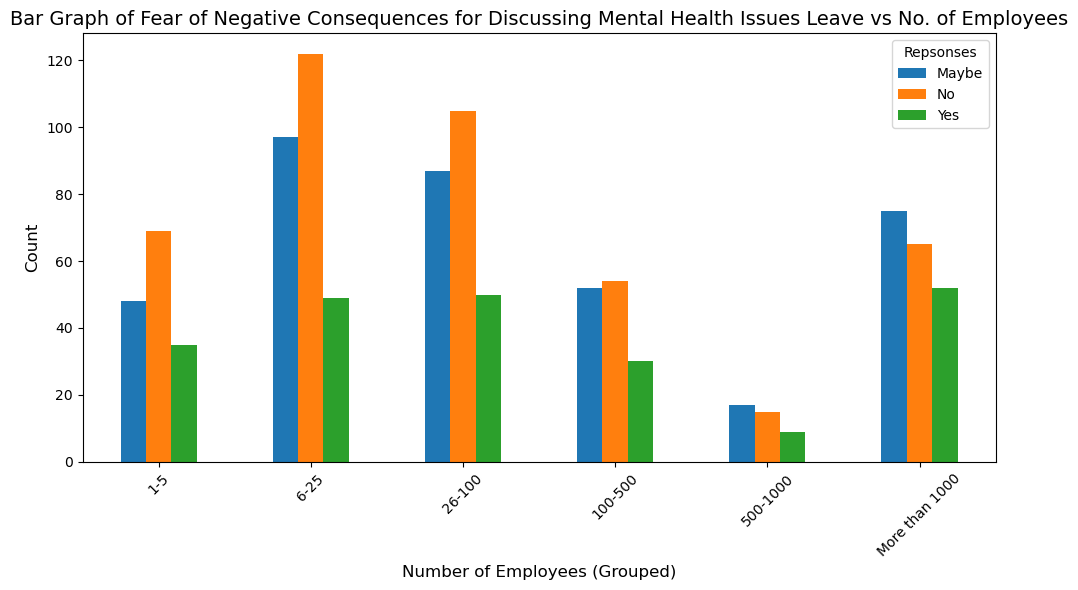

In [380]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Convert 'no_employees' to a categorical type with the correct order
mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'mental_health_consequence']).size().unstack(fill_value=0)



bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of Fear of Negative Consequences for Discussing Mental Health Issues Leave vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Repsonses')
# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\4139227902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\4139227902.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'coworkers']).size().unstack(fill_value=0)


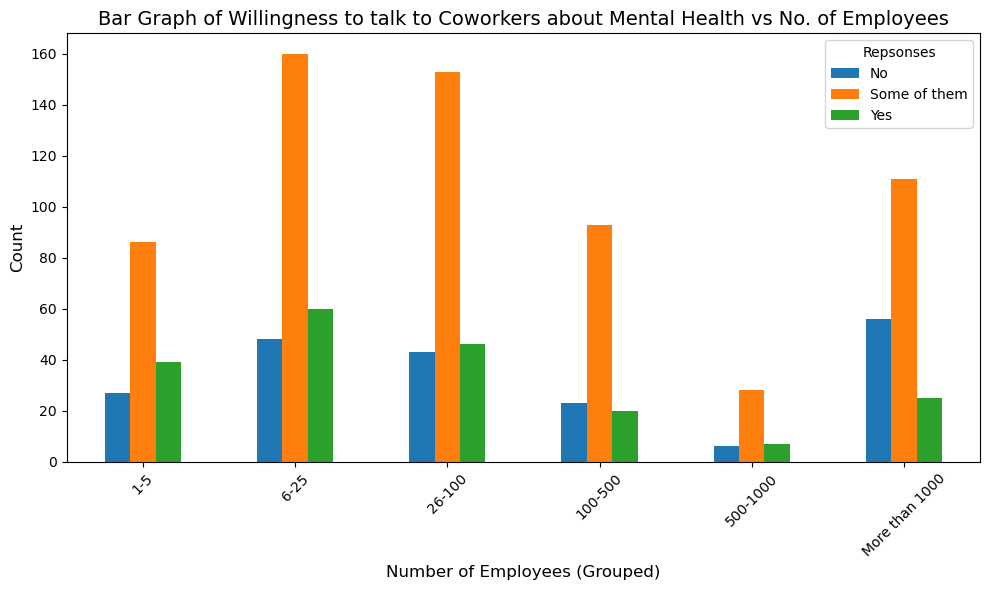

In [381]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Convert 'no_employees' to a categorical type with the correct order
mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'coworkers']).size().unstack(fill_value=0)



bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of Willingness to talk to Coworkers about Mental Health vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Repsonses')
# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\3294231534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\3294231534.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'supervisor']).size().unstack(fill_value=0)


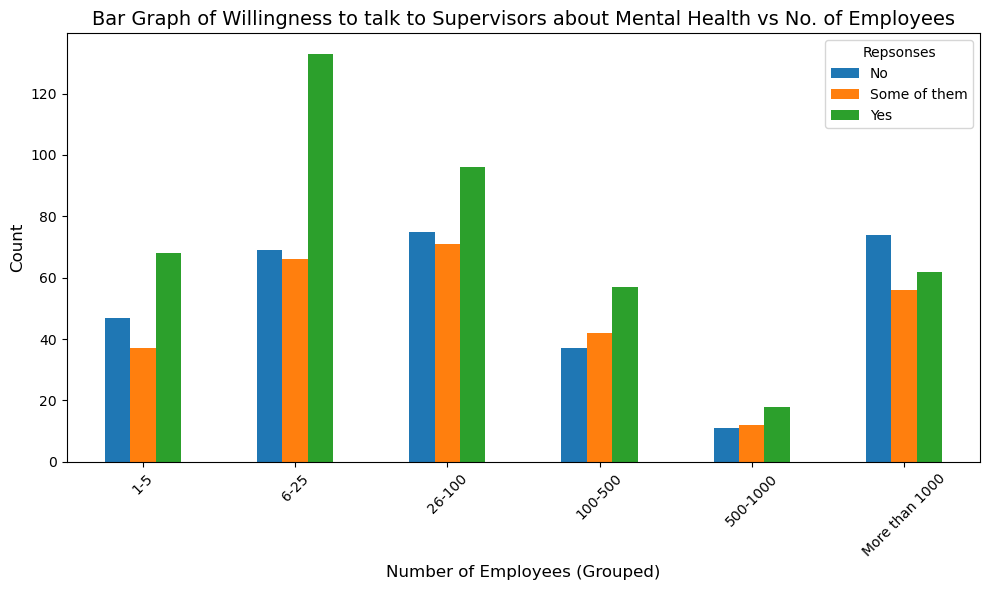

In [382]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Convert 'no_employees' to a categorical type with the correct order
mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'supervisor']).size().unstack(fill_value=0)



bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of Willingness to talk to Supervisors about Mental Health vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Repsonses')
# Display the plot
plt.tight_layout()
plt.show()

C:\Users\chase\AppData\Local\Temp\ipykernel_23612\4000362526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)
C:\Users\chase\AppData\Local\Temp\ipykernel_23612\4000362526.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = mental_health_data.groupby(['no_employees', 'obs_consequence']).size().unstack(fill_value=0)


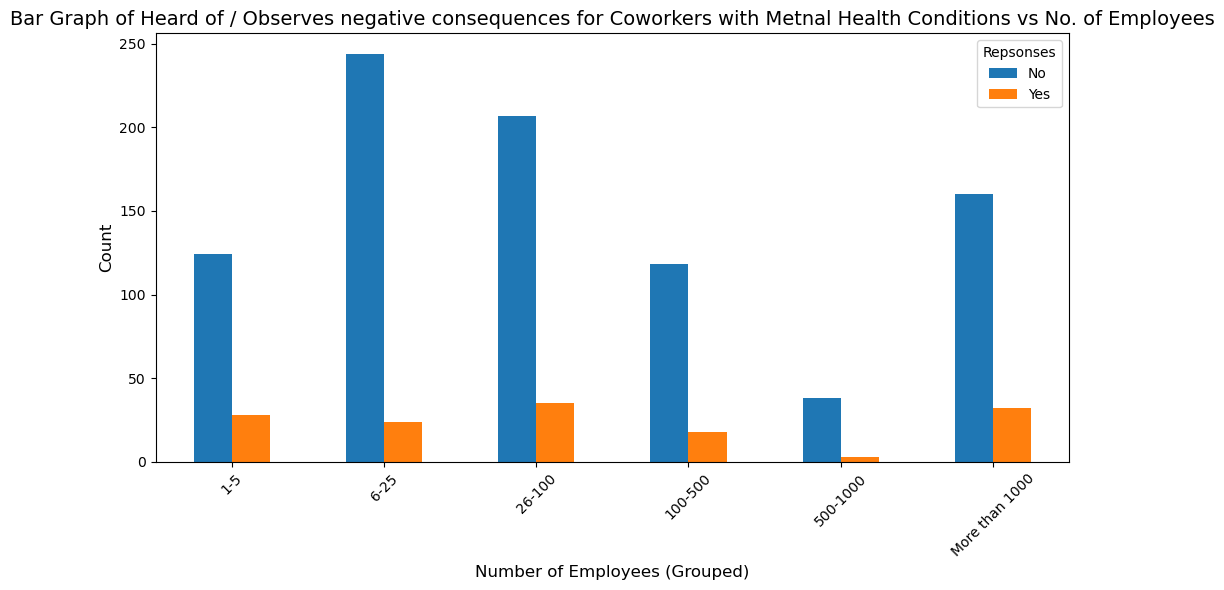

In [383]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Convert 'no_employees' to a categorical type with the correct order
mental_health_data['no_employees'] = pd.Categorical(mental_health_data['no_employees'], categories=employee_order, ordered=True)

bar_data = mental_health_data.groupby(['no_employees', 'obs_consequence']).size().unstack(fill_value=0)



bar_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Bar Graph of Heard of / Observes negative consequences for Coworkers with Metnal Health Conditions vs No. of Employees', fontsize=14)
plt.xlabel('Number of Employees (Grouped)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
legend = plt.legend(title='Repsonses')
# Display the plot
plt.tight_layout()
plt.show()